In [19]:
import json
import pandas as pd
import os, re
import networkx as nx
import io
from io import StringIO
import matplotlib.pyplot as plt
from collections import Iterable 
from io import BytesIO
import zipfile
setattr
from SPARQLWrapper import SPARQLWrapper

import nltk
from nltk import word_tokenize,sent_tokenize,ne_chunk
from nltk.corpus import stopwords

from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, SemanticRolesOptions, RelationsOptions, KeywordsOptions

In [2]:
from dotenv import load_dotenv
apikey = os.getenv('WATSON_API_KEY')
url = os.getenv('WATSON_API_URL')

authenticator = IAMAuthenticator(apikeys)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(url)

response = natural_language_understanding.analyze(
    text='『小岩井農場』日本最大の総合農場に行ってきましたの！【前編】 #小岩井農場 #上丸牛舎 #牛 #羊 #馬 #雫石 #滝沢 #岩手 #はてなブログ 『小岩井農場』日本最大の民間総合農場に行ってきましたの！【前編】 - 元IT土方の供述',
    features=Features(entities=EntitiesOptions(sentiment=True,limit=50)), language='ja').get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 116,
    "features": 1
  },
  "language": "ja",
  "entities": [
    {
      "type": "Facility",
      "text": "\u5c0f\u5ca9\u4e95\u8fb2\u5834",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.954265,
      "count": 2,
      "confidence": 0.597086
    },
    {
      "type": "Hashtag",
      "text": "#\u5c0f\u5ca9\u4e95\u8fb2\u5834",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.581077,
      "count": 1,
      "confidence": 0.8
    },
    {
      "type": "Facility",
      "text": "\u4e0a\u4e38\u725b\u820e #\u725b #\u7f8a #\u99ac #\u96eb\u77f3",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.49977,
      "count": 1,
      "confidence": 0.347653
    },
    {
      "type": "Ordinal",
      "text": "\u524d\u7de8",
      "sentiment": {
        "score": 0,
        "label": "neutral"
  

In [10]:
response = natural_language_understanding.analyze(
    text='フードアトリエです！本日12時～12時半頃まで滝沢市役所入口にて出張販売始めました！日替わりでお惣菜やお菓子など販売の予定です！お近くにお越しの際は覗いてもらえると嬉しいですよろしくお願いいたしま～す #滝沢市 #お惣菜 #お弁当 #フードアトリエ',
    features=Features(entities=EntitiesOptions(sentiment=True,limit=50)), language='ja').get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 124,
    "features": 1
  },
  "language": "ja",
  "entities": [
    {
      "type": "Duration",
      "text": "\u672c\u65e512\u6642\uff5e12\u6642\u534a\u9803",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.953262,
      "count": 1,
      "confidence": 0.318116
    },
    {
      "type": "Facility",
      "text": "\u6edd\u6ca2\u5e02\u5f79\u6240",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.887767,
      "count": 1,
      "confidence": 0.967949
    },
    {
      "type": "Hashtag",
      "text": "#\u6edd\u6ca2\u5e02",
      "sentiment": {
        "score": 0.928798,
        "label": "positive"
      },
      "relevance": 0.234743,
      "count": 1,
      "confidence": 0.8
    },
    {
      "type": "Hashtag",
      "text": "#\u304a\u60e3\u83dc",
      "sentiment": {
        "score": 0.928798,
        "label": "positive"
      

In [3]:
def analyze_using_NLU(text_content):
    '''
    Call Watson Natural Language Understanding service to obtain analysis results.
    '''
    response = natural_language_understanding.analyze(
        text= text_content,
        features=Features(
        entities=EntitiesOptions(),
        relations=RelationsOptions(),
        keywords= KeywordsOptions()),
        language='ja'
    )
    return response

In [117]:
print(analyze_using_NLU('『小岩井農場』日本最大の総合農場に行ってきましたの！【前編】 #小岩井農場 #上丸牛舎 #牛 #羊 #馬 #雫石 #滝沢 #岩手 #はてなブログ 『小岩井農場』日本最大の民間総合農場に行ってきましたの！【前編】 - 元IT土方の供述'))

{
    "result": {
        "usage": {
            "text_units": 1,
            "text_characters": 116,
            "features": 3
        },
        "relations": [
            {
                "type": "locatedAt",
                "sentence": "\u300c\u5c0f\u5ca9\u4e95\u8fb2\u5834\u300d\u65e5\u672c\u6700\u5927\u306e\u7dcf\u5408\u8fb2\u5834\u306b\u884c\u3063\u3066\u304d\u307e\u3057\u305f\u306e!",
                "score": 0.603407,
                "arguments": [
                    {
                        "text": "\u8fb2\u5834",
                        "location": [
                            14,
                            16
                        ],
                        "entities": [
                            {
                                "type": "Facility",
                                "text": "\u8fb2\u5834"
                            }
                        ]
                    },
                    {
                        "text": "\u65e5\u672c",
                

In [7]:
df_test = pd.read_csv('textdata_from_twitter.csv', names=["text", "label1", "label2", "label3", "label4", "label5"])
df_val = df_test['text']

raw_inputs = df_val.values.tolist()
raw_inputs = [str(t) for t in raw_inputs]

In [91]:
# 前処理
for i, text in enumerate(raw_inputs):
    text = text.replace("\n", "。")
    text = text.replace("#", ",")
    raw_inputs[i] = text

In [8]:
for text in raw_inputs:
    print(analyze_using_NLU(text))
#print(analyze_using_NLU('『小岩井農場』日本最大の総合農場に行ってきましたの！【前編】 #小岩井農場 #上丸牛舎 #牛 #羊 #馬 #雫石 #滝沢 #岩手 #はてなブログ 『小岩井農場』日本最大の民間総合農場に行ってきましたの！【前編】 - 元IT土方の供述'))

{
    "result": {
        "usage": {
            "text_units": 1,
            "text_characters": 135,
            "features": 3
        },
        "relations": [],
        "language": "ja",
        "keywords": [
            {
                "text": "\u30ab\u30e9\u30d5\u30eb\u30a2\u30a6\u30c8\u30ea\u30fc\u30c1",
                "relevance": 0.95983,
                "count": 1
            },
            {
                "text": "\u6728\u7ba1\u4e94\u91cd\u594f",
                "relevance": 0.797137,
                "count": 2
            },
            {
                "text": "\u82e5\u6797 \u611b",
                "relevance": 0.738829,
                "count": 1
            },
            {
                "text": "\u30a2\u30a6\u30c8\u30ea\u30fc\u30c1",
                "relevance": 0.722411,
                "count": 1
            },
            {
                "text": "\u30d6\u30ed\u30b0",
                "relevance": 0.417741,
                "count": 1
            },
           

In [102]:
relations = []
for json in response:
    if json.result["relations"] == []: continue
    relations.append(json.result["relations"])

In [123]:
relations[1][1]

{'type': 'locatedAt', 'sentence': '[前編] #小岩井農場 #上丸牛舎 #牛 #羊 #馬 #雫石 #滝沢 #岩手 #はてなブログ 「小岩井農場」日本最大の民間総合農場に行ってきましたの!', 'score': 0.92095, 'arguments': [{'text': '農場', 'location': [35, 37], 'entities': [{'type': 'Facility', 'text': '農場'}]}, {'text': '小岩井', 'location': [32, 35], 'entities': [{'type': 'Location', 'text': '小岩井'}]}]}

In [129]:
edge_list = []
for i, relation in enumerate(relations):
    for i, re in enumerate(relation):
        node = []
        node.append(re["arguments"][0]["text"])
        node.append(re["arguments"][1]["text"])
        node.append(re["type"])
        edge_list.append(node)

In [130]:
print(edge_list)

[['滝', '亀田不動', 'locatedAt'], ['農場', '日本', 'locatedAt'], ['農場', '小岩井', 'locatedAt'], ['上丸牛舎', '農場', 'locatedAt'], ['農場', '日本', 'locatedAt'], ['役所', '滝沢市', 'locatedAt'], ['アトリエ', '滝沢市', 'locatedAt'], ['磁器 #classical #ceramics #ceramicstudio #ゆいて', '岩手', 'locatedAt'], ['巣子 #since1969', '滝沢市', 'locatedAt'], ['施設長', '施設', 'locatedAt'], ['#盛岡市', '岩手県', 'locatedAt'], ['滝沢市', '#盛岡市', 'locatedAt'], ['施設', 'デイサービス', 'locatedAt'], ['長', '施設', 'managerOf'], ['#岩手県', '盛岡市', 'locatedAt'], ['滝沢市', '#岩手県', 'locatedAt'], ['よしゃれ通り', '雫石町', 'locatedAt'], ['商店街', 'よしゃれ通り', 'locatedAt'], ['滝沢市', '商店街', 'locatedAt'], ['#滝沢市', '朝市', 'locatedAt'], ['滝沢市', '滝沢', 'locatedAt'], ['#岩手県', '盛岡市', 'locatedAt'], ['滝沢市', '#岩手県', 'locatedAt'], ['#滝沢市', '岩手県', 'locatedAt'], ['岩手山', '#滝沢市', 'locatedAt'], ['役所', '滝沢市', 'locatedAt'], ['#奥州市', '金ケ崎町', 'locatedAt'], ['#岩手町', '#奥州市', 'locatedAt'], ['#Zアリーナ #', '#岩手町', 'locatedAt'], ['久慈市', '#Zアリーナ #', 'locatedAt'], ['#大槌町', '宮古市', 'locatedAt'], ['#矢巾町', '#大槌町', 'locatedAt'], 

In [131]:
source = []
target = []
edge = []
for i in edge_list:
    source.append(i[0])
    target.append(i[1])
    edge.append(i[2])

In [132]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':edge})

In [133]:
kg_df

,source,target,edge
0,滝,亀田不動,locatedAt
1,農場,日本,locatedAt
2,農場,小岩井,locatedAt
3,上丸牛舎,農場,locatedAt
4,農場,日本,locatedAt
...,...,...,...
298,滝沢市,八幡平,locatedAt
299,遠野市,八幡平,locatedAt
300,岩手県立大学,Voters～,ownerOf
301,大学,県立,basedIn


In [134]:
kg_df.to_csv("relation.csv")

In [137]:
kg_modified_df = pd.read_csv("relation_modified.csv")

In [138]:
kg_modified_df = kg_modified_df.iloc[:, 1:]

/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/p

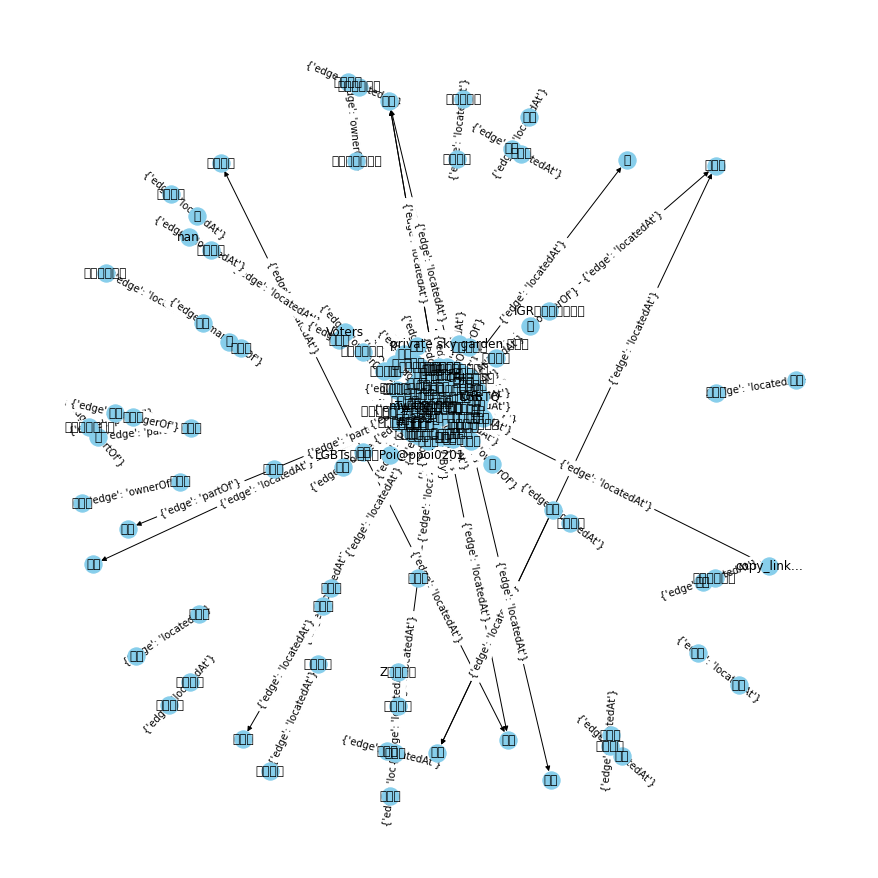

In [139]:
G=nx.from_pandas_edgelist(kg_modified_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(G, pos=pos)
plt.show()

In [140]:
nx.write_gpickle(G, 'sample_graph_takizawa_twitter.pkl')

In [20]:
from SPARQLWrapper import SPARQLWrapper

sparql = SPARQLWrapper(endpoint='http://ja.dbpedia.org/sparql', returnFormat='json')
sparql.setQuery("""                                                                                                                                                                                                                                                                                                       
    select * where { <http://ja.dbpedia.org/resource/滝沢市> ?p ?o . }                                                                                                                  
""")
results = sparql.query().convert()

In [21]:
print(json.dumps(results, indent=2))

{
  "head": {
    "link": [],
    "vars": [
      "p",
      "o"
    ]
  },
  "results": {
    "distinct": false,
    "ordered": true,
    "bindings": [
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://www.w3.org/2002/07/owl#Thing"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://dbpedia.org/ontology/City"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://dbpedia.org/ontology/Settlement"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type

In [22]:
print(results["results"]["bindings"][0])

{'p': {'type': 'uri', 'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}, 'o': {'type': 'uri', 'value': 'http://www.w3.org/2002/07/owl#Thing'}}


In [23]:
edge_list = []
for relation in results["results"]["bindings"]:
    node = []
    node.append(relation["p"]["type"])
    node.append(relation["p"]["value"])
    node.append(relation["o"]["type"])
    node.append(relation["o"]["value"])
    edge_list.append(node)

In [24]:
entity = []
for i, o in enumerate(edge_list):
    if o[2] == "uri":
        entity.append(o[3])

In [25]:
entity = entity[43:]

In [26]:
entity = entity[:152]

In [27]:
entity = entity[:144]

In [28]:
for i, o in enumerate(entity):
    entity[i] = entity[i].replace("http://ja.dbpedia.org/resource/", "")

In [29]:
entity

['IGRいわて銀河鉄道',
 'JAバンク',
 'あねっこバス',
 'いわて沼宮内駅',
 'いわて銀河鉄道線',
 'お笑いタレント',
 'ご当地ナンバー',
 'みちのくプロレス',
 'カッコウ',
 'サクラ',
 'サンデープロジェクト',
 'ジェイアールバス東北',
 'スイカ',
 'チャグチャグ馬コ',
 'テレビ岩手',
 'テレビ朝日',
 'ビッグルーフ滝沢',
 'ベッドタウン',
 'ペットの里',
 'ミクニ',
 'ヤマユリ',
 'ルーレット式おみくじ器',
 '一般国道',
 '三浦翔太',
 '上田常隆',
 '中核市',
 '中頭郡',
 '主濱了',
 '主要地方道',
 '交番',
 '伊東竜二',
 '八幡平市',
 '加村真美',
 '北上川',
 '南岩手郡',
 '単独市制',
 '収納代理金融機関',
 '告示',
 '国立青少年交流の家',
 '国道282号',
 '国道46号',
 '国道4号',
 '地方自治法',
 '城',
 '大宮政志',
 '大日本プロレス',
 '大村友貴美',
 '大釜駅',
 '奥州市',
 '安倍氏_(奥州)',
 '小学館',
 '小岩井駅',
 '山本吉昭',
 '岩手山',
 '岩手産業文化センター',
 '岩手県',
 '岩手県交通',
 '岩手県交通巣子車庫',
 '岩手県交通滝沢営業所',
 '岩手県北自動車',
 '岩手県立大学',
 '岩手県立大学盛岡短期大学部',
 '岩手県立盛岡北高等学校',
 '岩手県立盛岡農業高等学校',
 '岩手県道130号大釜停車場線',
 '岩手県道131号小岩井停車場線',
 '岩手県道16号盛岡環状線',
 '岩手県道219号網張温泉線',
 '岩手県道223号盛岡滝沢線',
 '岩手県道278号鵜飼安達巣子線',
 '岩手県道・秋田県道1号盛岡横手線',
 '岩手運輸支局',
 '岩手郡',
 '岩手駐屯地',
 '岩清水梓',
 '島尻郡',
 '川村真樹_(バレエダンサー)',
 '巣子駅',
 '市',
 '市町村旗',
 '市町村章',
 '市町村長',
 '平庭高原線',
 '平成',
 '指定金融機関',
 '新国立劇場',
 '新山_(紫波町)',
 '新岩手農業協同組合',
 '日本の市町村の廃置分

In [30]:
subgraph = []
sparql = SPARQLWrapper(endpoint='http://ja.dbpedia.org/sparql', returnFormat='json')
for i, search in enumerate(entity):
    sparql.setQuery("""select * where { <http://ja.dbpedia.org/resource/""" + search + 
                    """> ?p ?o . }                                                                                                                  
                    """)
    subgraph.append(sparql.query().convert())

In [31]:
print(json.dumps(subgraph[0], indent=2))

{
  "head": {
    "link": [],
    "vars": [
      "p",
      "o"
    ]
  },
  "results": {
    "distinct": false,
    "ordered": true,
    "bindings": [
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://www.w3.org/2002/07/owl#Thing"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://dbpedia.org/ontology/Company"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://dbpedia.org/ontology/Organisation"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns

In [32]:
subgraph_edge_list = []
for graph in subgraph:
    subgraph_edge = []
    for relation in graph["results"]["bindings"]:
        node = []
        node.append(relation["o"]["value"])
        subgraph_edge.append(node)
    subgraph_edge_list.append(subgraph_edge)

In [33]:
for i, subgraph in enumerate(subgraph_edge_list):
    for j, entity_s in enumerate(subgraph):
        if 'http://ja.dbpedia.org/resource/' in entity_s[0]:

            subgraph_edge_list[i][j][0] = entity_s[0].replace('http://ja.dbpedia.org/resource/', '')
        else:
            subgraph_edge_list[i][j][0] = ""

In [34]:
for i, y in enumerate(subgraph_edge_list):
    subgraph_edge_list[i] = sum(subgraph_edge_list[i], [])

In [35]:
for i, y in enumerate(subgraph_edge_list):
    subgraph_edge_list[i] = [a for a in subgraph_edge_list[i] if not a == ""]
    subgraph_edge_list[i] = [a for a in subgraph_edge_list[i] if not "Category:" in a]
    subgraph_edge_list[i] = [a for a in subgraph_edge_list[i] if not "ファイル:" in a]
    subgraph_edge_list[i] = [a for a in subgraph_edge_list[i] if not "Template:" in a]

In [36]:
subgraph_edge_list[15]

['オールニッポン・ニュースネットワーク',
 '伊能忠敬_子午線の夢',
 '幸福のアリバイ〜Picture〜',
 '1980年モスクワオリンピック',
 '1982年',
 '1月27日',
 '2000年',
 '2002_FIFAワールドカップ',
 '2003年',
 '2003年自由民主党総裁選挙',
 '2006_FIFAワールドカップ',
 '2010_FIFAワールドカップ',
 '2011年',
 '2014_FIFAワールドカップ',
 '2時間ドラマ',
 '3B_junior',
 '3B_juniorの星くず商事',
 '5',
 '5月11日',
 '5月31日',
 '69_sixty_nine',
 '7月24日通りのクリスマス',
 'ABEMA_Morning',
 'ABEMA_Prime',
 'ABEMAヒルズ',
 'ABEMA的ニュースショー',
 'AFCアジアカップ',
 'AFCアジアカップ2011',
 'AFCチャンピオンズリーグ',
 'AFC女子アジアカップ',
 'ANN_NEWS&SPORTS',
 'ANNニュース',
 'ANiMAZiNG!!!',
 'AbemaNews',
 'AbemaTV',
 'Au_(携帯電話)',
 'BALLAD_名もなき恋のうた',
 'BIG_RIVER',
 'CASSHERN',
 'CATV富士五湖',
 'CNN',
 'CNNサタデーナイト',
 'EZニュースEX',
 'FIFAワールドカップ',
 'FLEX',
 'Friends_もののけ島のナキ',
 'GOEMON_(映画)',
 'ISUグランプリシリーズ',
 'JPタワー',
 'K-1',
 'KDDI',
 'LINE_(アプリケーション)',
 'L・DK',
 'M&A',
 'M-1グランプリ',
 'MBSテレビ',
 'Music-enta',
 'NHK杯国際フィギュアスケート競技大会',
 'NUMAnimation',
 'News_Access',
 'RAILWAYS_49歳で電車の運転士になった男の物語',
 'ROCKERS',
 'SCOOP!',
 'SLAM_DUNK',
 'SmaSTATION!!',
 "TAKESHIS'",
 'TAP_

In [50]:
subgraph = []
for i, node in enumerate(entity):
    temp = []
    temp.append("滝沢市")
    temp.append(node)
    subgraph.append(temp)
for i, node in enumerate(entity):
    for j, node_a in enumerate(subgraph_edge_list[i]):
        temp = []
        temp.append(node)
        temp.append(node_a)
        subgraph.append(temp)

In [51]:
subgraph

[['滝沢市', 'IGRいわて銀河鉄道'],
 ['滝沢市', 'JAバンク'],
 ['滝沢市', 'あねっこバス'],
 ['滝沢市', 'いわて沼宮内駅'],
 ['滝沢市', 'いわて銀河鉄道線'],
 ['滝沢市', 'お笑いタレント'],
 ['滝沢市', 'ご当地ナンバー'],
 ['滝沢市', 'みちのくプロレス'],
 ['滝沢市', 'カッコウ'],
 ['滝沢市', 'サクラ'],
 ['滝沢市', 'サンデープロジェクト'],
 ['滝沢市', 'ジェイアールバス東北'],
 ['滝沢市', 'スイカ'],
 ['滝沢市', 'チャグチャグ馬コ'],
 ['滝沢市', 'テレビ岩手'],
 ['滝沢市', 'テレビ朝日'],
 ['滝沢市', 'ビッグルーフ滝沢'],
 ['滝沢市', 'ベッドタウン'],
 ['滝沢市', 'ペットの里'],
 ['滝沢市', 'ミクニ'],
 ['滝沢市', 'ヤマユリ'],
 ['滝沢市', 'ルーレット式おみくじ器'],
 ['滝沢市', '一般国道'],
 ['滝沢市', '三浦翔太'],
 ['滝沢市', '上田常隆'],
 ['滝沢市', '中核市'],
 ['滝沢市', '中頭郡'],
 ['滝沢市', '主濱了'],
 ['滝沢市', '主要地方道'],
 ['滝沢市', '交番'],
 ['滝沢市', '伊東竜二'],
 ['滝沢市', '八幡平市'],
 ['滝沢市', '加村真美'],
 ['滝沢市', '北上川'],
 ['滝沢市', '南岩手郡'],
 ['滝沢市', '単独市制'],
 ['滝沢市', '収納代理金融機関'],
 ['滝沢市', '告示'],
 ['滝沢市', '国立青少年交流の家'],
 ['滝沢市', '国道282号'],
 ['滝沢市', '国道46号'],
 ['滝沢市', '国道4号'],
 ['滝沢市', '地方自治法'],
 ['滝沢市', '城'],
 ['滝沢市', '大宮政志'],
 ['滝沢市', '大日本プロレス'],
 ['滝沢市', '大村友貴美'],
 ['滝沢市', '大釜駅'],
 ['滝沢市', '奥州市'],
 ['滝沢市', '安倍氏_(奥州)'],
 ['滝沢市', '小学館'],
 ['滝沢市', '小岩井駅'],
 

In [52]:
subgraph_df = pd.DataFrame(subgraph)
subgraph_df.columns = ["source", "target"]

In [59]:
type(subgraph_df)

pandas.core.frame.DataFrame

In [60]:
subgraph_df.to_csv("subgraph.csv")

/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chibaren/Library/Python/3.8/lib/p

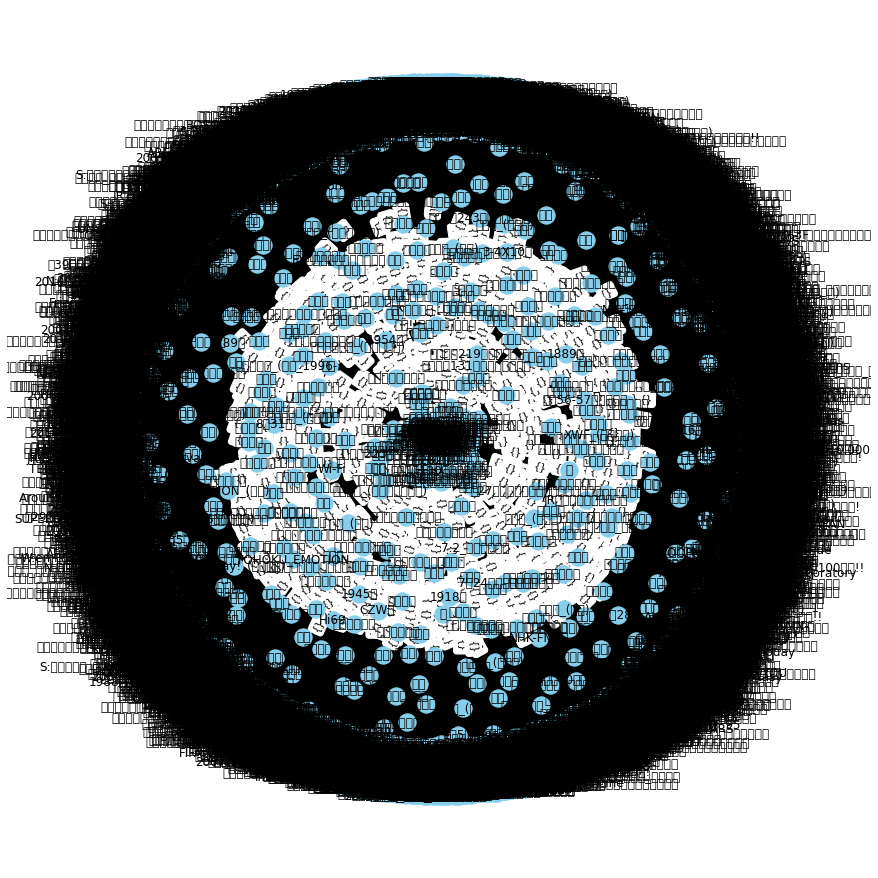

In [57]:
G=nx.from_pandas_edgelist(subgraph_df, "source", "target", edge_attr=None, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(G, pos=pos)
plt.show()

In [61]:
nx.write_gpickle(G, 'graph_takizawa_wikiedia.pkl')

In [62]:
subgraph_modified_df = pd.read_csv("data/relation/subgraph_modified.csv")

In [63]:
subgraph_modified_df

,Unnamed: 0,source,target,flag
0,0,滝沢市,IGRいわて銀河鉄道,NaN
1,1,滝沢市,JAバンク,NaN
2,2,滝沢市,あねっこバス,NaN
3,3,滝沢市,いわて沼宮内駅,NaN
4,4,滝沢市,いわて銀河鉄道線,NaN
...,...,...,...,...
32162,32162,高速自動車国道,鹿屋串良ジャンクション,NaN
32163,32163,高速自動車国道,黒埼インターチェンジ,NaN
32164,32164,高速自動車国道,中国縦貫自動車道,NaN
32165,32165,高速自動車国道,最低速度,NaN


In [68]:
subgraph_modified_df = subgraph_modified_df[subgraph_modified_df["flag"] != 1]

In [69]:
subgraph_modified_df

,Unnamed: 0,source,target,flag
0,0,滝沢市,IGRいわて銀河鉄道,NaN
1,1,滝沢市,JAバンク,NaN
2,2,滝沢市,あねっこバス,NaN
3,3,滝沢市,いわて沼宮内駅,NaN
4,4,滝沢市,いわて銀河鉄道線,NaN
...,...,...,...,...
32162,32162,高速自動車国道,鹿屋串良ジャンクション,NaN
32163,32163,高速自動車国道,黒埼インターチェンジ,NaN
32164,32164,高速自動車国道,中国縦貫自動車道,NaN
32165,32165,高速自動車国道,最低速度,NaN
